<center>
<img src="../../img/ods_stickers.jpg" />
    
## [mlcourse.ai](https://mlcourse.ai) – Open Machine Learning Course 

Author: [Yury Kashnitsky](https://yorko.github.io). This material is subject to the terms and conditions of the [Creative Commons CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/) license. Free use is permitted for any non-commercial purpose.

# <center> Topic 1. Exploratory data analysis with Pandas
## <center>Practice. Analyzing "Titanic" passengers

**Fill in the missing code ("You code here") and choose answers in a [web-form](https://docs.google.com/forms/d/16EfhpDGPrREry0gfDQdRPjoiQX9IumaL2mPR0rcj19k/edit).**

In [41]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

# Graphics in SVG format are more sharp and legible
%config InlineBackend.figure_format = 'svg'
pd.set_option("display.precision", 2)

**Read data into a Pandas DataFrame**

In [2]:
data = pd.read_csv("../../data/titanic_train.csv", index_col="PassengerId")

**First 5 rows**

In [3]:
data.head(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.28,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.92,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.10,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.05,NaN,S


In [4]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.00,891.00,714.00,891.00,891.00,891.00
mean,0.38,2.31,29.70,0.52,0.38,32.20
std,0.49,0.84,14.53,1.10,0.81,49.69
min,0.00,1.00,0.42,0.00,0.00,0.00
25%,0.00,2.00,20.12,0.00,0.00,7.91
50%,0.00,3.00,28.00,0.00,0.00,14.45
75%,1.00,3.00,38.00,1.00,0.00,31.00
max,1.00,3.00,80.00,8.00,6.00,512.33


**Let's select those passengers who embarked in Cherbourg (Embarked=C) and paid > 200 pounds for their ticker (fare > 200).**

Make sure you understand how actually this construction works.

In [5]:
data[(data["Embarked"] == "C") & (data.Fare > 200)].head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
119,0,1,"Baxter, Mr. Quigg Edmond",male,24.0,0,1,PC 17558,247.52,B58 B60,C
259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.33,NaN,C
300,1,1,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",female,50.0,0,1,PC 17558,247.52,B58 B60,C
312,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.38,B57 B59 B63 B66,C
378,0,1,"Widener, Mr. Harry Elkins",male,27.0,0,2,113503,211.50,C82,C


**We can sort these people by Fare in descending order.**

In [6]:
data[(data["Embarked"] == "C") & (data["Fare"] > 200)].sort_values(
    by="Fare", ascending=False
).head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.33,NaN,C
680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.33,B51 B53 B55,C
738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.33,B101,C
312,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.38,B57 B59 B63 B66,C
743,1,1,"Ryerson, Miss. Susan Parker ""Suzette""",female,21.0,2,2,PC 17608,262.38,B57 B59 B63 B66,C


**Let's create a new feature.**

In [7]:
def age_category(age):
    """
    < 30 -> 1
    >= 30, <55 -> 2
    >= 55 -> 3
    """
    if age < 30:
        return 1
    elif age < 55:
        return 2
    elif age >= 55:
        return 3

In [9]:
age_categories = [age_category(age) for age in data.Age]
data["Age_category"] = age_categories

**Another way is to do it with `apply`.**

In [10]:
data["Age_category"] = data["Age"].apply(age_category)

**1. How many men/women were there onboard?**
- 412 men and 479 women
- 314 men and 577 women
- 479 men and 412 women
- 577 men and 314 women

In [16]:
data.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

**2. Print the distribution of the `Pclass` feature. Then the same, but for men and women separately. How many men from second class were there onboard?**
- 104
- 108
- 112
- 125

In [18]:
data.Pclass.value_counts(sort=False)

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [27]:
data[(data['Sex'] == 'male') & (data['Pclass'] == 2)].shape

(108, 12)

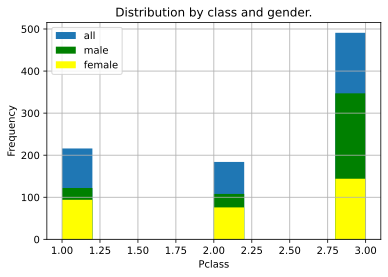

In [94]:
data["Pclass"].hist(label="all")
data[data["Sex"] == "male"]["Pclass"].hist(color="green", label="male")
data[data["Sex"] == "female"]["Pclass"].hist(color="yellow", label="female")
plt.title("Distribution by class and gender.")
plt.xlabel("Pclass")
plt.ylabel("Frequency")
plt.legend(loc="upper left");

**3. What are median and standard deviation of `Fare`?. Round to two decimals.**
- median is  14.45, standard deviation is 49.69
- median is 15.1, standard deviation is 12.15
- median is 13.15, standard deviation is 35.3
- median is  17.43, standard deviation is 39.1

In [28]:
data['Fare'].describe()

count    891.00
mean      32.20
std       49.69
min        0.00
25%        7.91
50%       14.45
75%       31.00
max      512.33
Name: Fare, dtype: float64

**4. Is that true that the mean age of survived people is higher than that of passengers who eventually died?**
- Yes
- No


In [33]:
data.groupby(by=['Survived'])['Age'].mean()

Survived
0    30.63
1    28.34
Name: Age, dtype: float64

**5. Is that true that passengers younger than 30 y.o. survived more frequently than those older than 60 y.o.? What are shares of survived people among young and old people?**
- 22.7% among young and 40.6% among old
- 40.6% among young and 22.7% among old
- 35.3% among young and 27.4% among old
- 27.4% among young and  35.3% among old

In [34]:
def set_age_group(age):
    if age < 30:
        return 'young'
    elif age > 60:
        return 'old'
    else:
        return 'middleage'
    
data['age_group'] = data['Age'].apply(set_age_group)

data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_category,age_group
PassengerId,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S,1.0,young
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.28,C85,C,2.0,middleage
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.92,NaN,S,1.0,young
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.10,C123,S,2.0,middleage
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.05,NaN,S,2.0,middleage


In [67]:
no_middles = data[data['age_group'] != 'middleage']
pd.crosstab(no_middles['age_group'], no_middles['Survived'], normalize='index')

Survived,0,1
age_group,,
old,0.77,0.23
young,0.59,0.41


**6. Is that true that women survived more frequently than men? What are shares of survived people among men and women?**
- 30.2% among men and 46.2% among women
- 35.7% among men and 74.2% among women
- 21.1% among men and 46.2% among women
- 18.9% among men and 74.2% among women

In [68]:
pd.crosstab(data['Sex'], data['Survived'], normalize='index')

Survived,0,1
Sex,,
female,0.26,0.74
male,0.81,0.19


**7. What's the most popular first name among male passengers?**
- Charles
- Thomas
- William
- John

In [89]:
data[data.Sex == 'male'].head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_category,age_group,first_name
PassengerId,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S,1.0,young,Braund
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.05,NaN,S,2.0,middleage,Allen
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.46,NaN,Q,NaN,middleage,Moran
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.86,E46,S,2.0,middleage,McCarthy
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.07,NaN,S,1.0,young,Palsson


'Owen'

In [90]:
data['first_name'] = data['Name'].apply(lambda name: name.split(',')[1].split()[1])
data[data['Sex'] == 'male']['first_name'].value_counts()

William    35
John       25
George     14
Charles    13
Thomas     13
           ..
Ignjac      1
Yoto        1
Austen      1
Mitto       1
Juozas      1
Name: first_name, Length: 287, dtype: int64

**8. How is average age for men/women dependent on `Pclass`? Choose all correct statements:**
- On average, men of 1 class are older than 40
- On average, women of 1 class are older than 40
- Men of all classes are on average older than women of the same class
- On average, passengers ofthe first class are older than those of the 2nd class who are older than passengers of the 3rd class

In [91]:
data.groupby(['Pclass', 'Sex'])['Age'].mean()

Pclass  Sex   
1       female    34.61
        male      41.28
2       female    28.72
        male      30.74
3       female    21.75
        male      26.51
Name: Age, dtype: float64

/Users/aulasau/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


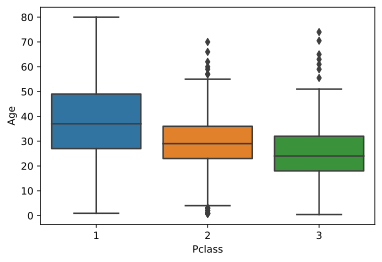

In [93]:
import seaborn as sns
sns.boxplot(data["Pclass"], data["Age"]);

## Useful resources
* The same notebook as an interactive web-based [Kaggle Kernel](https://www.kaggle.com/kashnitsky/topic-1-practice-analyzing-titanic-passengers) with a [solution](https://www.kaggle.com/kashnitsky/topic-1-practice-solution)
* Topic 1 "Exploratory Data Analysis with Pandas" as a [Kaggle Kernel](https://www.kaggle.com/kashnitsky/topic-1-exploratory-data-analysis-with-pandas)
* Main course [site](https://mlcourse.ai), [course repo](https://github.com/Yorko/mlcourse.ai), and YouTube [channel](https://www.youtube.com/watch?v=QKTuw4PNOsU&list=PLVlY_7IJCMJeRfZ68eVfEcu-UcN9BbwiX)